In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('goals_predict.csv')
df.head()

,player_id,name,season,age_at_season_start,position,foot,height_in_cm,avg_market_value_season,appearances_season,total_minutes_played_season,total_goals_season,total_assists_season
0,10,Miroslav Klose,2012,34.06,Attack,right,184.0,4000000.0,36,2585,16,3
1,10,Miroslav Klose,2013,35.06,Attack,right,184.0,1000000.0,29,2220,8,5
2,10,Miroslav Klose,2014,36.06,Attack,right,184.0,1000000.0,40,2289,16,9
3,10,Miroslav Klose,2015,37.06,Attack,right,184.0,1000000.0,31,1714,8,8
4,132,Tomas Rosicky,2012,31.74,Midfield,both,179.0,2000000.0,15,904,3,1


In [2]:
df_processed = pd.get_dummies(df, columns=['position', 'foot'], dtype=int)
df_processed['age_at_season_start'] = df_processed['age_at_season_start'].astype(int)
df_processed.head()

,player_id,name,season,age_at_season_start,height_in_cm,avg_market_value_season,appearances_season,total_minutes_played_season,total_goals_season,total_assists_season,position_Attack,position_Defender,position_Midfield,position_Missing,foot_both,foot_left,foot_right
0,10,Miroslav Klose,2012,34,184.0,4000000.0,36,2585,16,3,1,0,0,0,0,0,1
1,10,Miroslav Klose,2013,35,184.0,1000000.0,29,2220,8,5,1,0,0,0,0,0,1
2,10,Miroslav Klose,2014,36,184.0,1000000.0,40,2289,16,9,1,0,0,0,0,0,1
3,10,Miroslav Klose,2015,37,184.0,1000000.0,31,1714,8,8,1,0,0,0,0,0,1
4,132,Tomas Rosicky,2012,31,179.0,2000000.0,15,904,3,1,0,0,1,0,1,0,0


In [3]:
X = df_processed.drop(['player_id', 'name', 'avg_market_value_season', 'foot_both', 'position_Missing', 'total_goals_season', 'total_assists_season'], axis=1)
X.head()

,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
0,2012,34,184.0,36,2585,1,0,0,0,1
1,2013,35,184.0,29,2220,1,0,0,0,1
2,2014,36,184.0,40,2289,1,0,0,0,1
3,2015,37,184.0,31,1714,1,0,0,0,1
4,2012,31,179.0,15,904,0,0,1,0,0


In [4]:
y = df_processed[['total_goals_season', 'total_assists_season']]
y.head()
type(y)

pandas.core.frame.DataFrame

In [5]:
# Add Bias

X_bias = pd.concat([pd.Series(1, index=X.index, name='bias'), X], axis=1)
X_bias.head()


,bias,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
0,1,2012,34,184.0,36,2585,1,0,0,0,1
1,1,2013,35,184.0,29,2220,1,0,0,0,1
2,1,2014,36,184.0,40,2289,1,0,0,0,1
3,1,2015,37,184.0,31,1714,1,0,0,0,1
4,1,2012,31,179.0,15,904,0,0,1,0,0


In [6]:
# Create a shuffled index
shuffled_idx = X_bias.sample(frac=1, random_state=42).index

# Split indices
train_idx = shuffled_idx[:int(0.8 * len(shuffled_idx))]
test_idx = shuffled_idx[int(0.8 * len(shuffled_idx)):]

# Split X and y using the same indices
X_train = X_bias.loc[train_idx]
X_test = X_bias.loc[test_idx]

y_train = y.loc[train_idx]
y_test = y.loc[test_idx]


In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.tail())
X_train.tail()


(61832, 11)
(15459, 11)
(61832, 2)
(15459, 2)
       total_goals_season  total_assists_season
982                     0                     0
5023                    0                     1
60886                   7                     4
24930                   0                     0
41495                   2                     0


,bias,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
982,1,2017,36,189.0,11,578,0,0,1,0,1
5023,1,2012,28,178.0,32,2864,0,0,1,0,1
60886,1,2022,24,191.0,55,4938,0,1,0,0,1
24930,1,2014,22,183.0,15,1068,0,1,0,0,1
41495,1,2024,30,190.0,37,2694,0,1,0,0,1


In [8]:
col_std = X_train.columns[1:6]

mean = X_train[col_std].mean()
std = X_train[col_std].std()

# Scaling

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[col_std] = (X_train[col_std] - mean) / std
X_test_scaled[col_std] = (X_test[col_std] - mean) / std

X_train_scaled


,bias,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
61820,1,-0.270838,-1.295597,0.698375,-1.557605,-1.241320,0,1,0,1,0
10138,1,-0.000825,1.201733,-1.799233,1.362190,1.764384,0,1,0,1,0
72371,1,0.539201,-0.614507,0.386174,0.064503,-0.692088,1,0,0,0,1
28346,1,-0.810864,-0.614507,-0.394329,-1.476500,-1.310338,0,0,1,0,1
64400,1,1.619252,0.066583,2.103280,-0.259918,0.036007,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
982,1,-0.270838,2.563912,1.166677,-0.746551,-0.766939,0,0,1,0,1
5023,1,-1.620903,0.747673,-0.550429,0.956663,1.455259,0,0,1,0,1
60886,1,1.079227,-0.160447,1.478878,2.822087,3.471375,0,1,0,0,1
24930,1,-1.080877,-0.614507,0.230074,-0.422129,-0.290615,0,1,0,0,1


In [9]:
# --- 1. Log transform ---
y_train_log = np.log1p(y_train)   # shape (n_samples, 2)
y_test_log = np.log1p(y_test)

# --- 2. Compute mean and std per output (column-wise) ---
y_mean = y_train_log.mean(axis=0)   # shape (2,)
y_std = y_train_log.std(axis=0)     # shape (2,)

# --- 3. Scale ---
y_train_scaled = (y_train_log - y_mean) / y_std
y_test_scaled = (y_test_log - y_mean) / y_std


In [10]:

# --- 1. Prepare matrices ---
X = X_train_scaled.values.astype(float)
y = y_train_scaled.values.astype(float)
print(X.shape)
print(y.shape)
print(y_train_scaled.shape)

n_samples, n_features = X.shape

# --- 2. Initialize weights ---
np.random.seed(42)
w = np.random.randn(n_features, y.shape[1]) * 0.01   # small random values

# --- 3. Set hyperparameters ---
alpha = 0.01    # learning rate
n_iter = 500 # number of iterations


# --- 4. Gradient Descent Loop ---
losses = []

for i in range(n_iter):
    # Predictions
    y_pred = X.dot(w)
    
    # Compute error
    error = y_pred - y
    
    # Compute loss (MSE)
    loss = (error**2).mean()
    losses.append(loss)
    
    # Compute gradient
    grad = (2 / n_samples) * X.T.dot(error)
    
    # Update weights
    w -= alpha * grad
    
    # Optional: print every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.6f}")

# --- 5. Final weights ---
print("\nTraining completed!")
print("Final Loss:", losses[-1])


(61832, 11)
(61832, 2)
(61832, 2)
Iteration 0, Loss: 1.004402


Iteration 100, Loss: 0.521157
Iteration 200, Loss: 0.496697
Iteration 300, Loss: 0.490129
Iteration 400, Loss: 0.488233

Training completed!
Final Loss: 0.4876725827554651


In [11]:
# --- Assuming y_train_scaled is a DataFrame with two columns: ---
# 'total_goals_season' and 'total_assists_season'

# 1. Compute mean and std per output
# y_mean = y_train_scaled.mean(axis=0).values   # shape (2,)
# y_std = y_train_scaled.std(axis=0).values     # shape (2,)

# 2. Prepare test data
X_test_np = X_test_scaled.values.astype(float)   # (n_samples, n_features)

# 3. Predict in scaled log space
y_pred_scaled = X_test_np.dot(w)    # (n_samples, 2)

# 4. Invert scaling (element-wise)
y_pred_log = y_pred_scaled * y_std.values + y_mean.values      # broadcast multiplies/adds per output

# 5. Invert log transform
y_pred_final = np.expm1(y_pred_log)   # exp(y) - 1, element-wise

# 6. Clip predictions to be non-negative
y_pred_final[y_pred_final < 0] = 0


# 6. Optionally convert to DataFrame for easier handling
y_pred_final_df = pd.DataFrame(
    y_pred_final,
    columns=['total_goals_season', 'total_assists_season']
)

# 7. Get actual values for comparison (make sure to select columns)
y_actual = y_test[['total_goals_season', 'total_assists_season']].values

# Now y_pred_final_df and y_actual are ready for evaluation or analysis


In [12]:
# Mean Squared Error
mse = np.mean((y_pred_final - y_actual)**2)

# Mean Absolute Error
mae = np.mean(np.abs(y_pred_final - y_actual))

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# Visual check: show a few predictions vs actuals
df_compare = pd.DataFrame({
    'Actual_goals': y_actual[:10, 0],
    'Predicted_goals': y_pred_final[:10, 0],
    'Actual_assists': y_actual[:10, 1],
    'Predicted_assists': y_pred_final[:10, 1]
})

print(df_compare)


MSE: 5.89
MAE: 1.27
   Actual_goals  Predicted_goals  Actual_assists  Predicted_assists
0             1         0.702023               0           0.954014
1             0         0.000000               1           0.000000
2             1         0.274081               0           0.586234
3             0         0.391197               0           0.555734
4             0         0.045171               0           0.240624
5             0         1.550482               1           1.894858
6            16         8.051070              14           5.673374
7             0         0.432407               0           0.558996
8            14         3.616232               3           2.083650
9             2         1.760290               0           0.754839


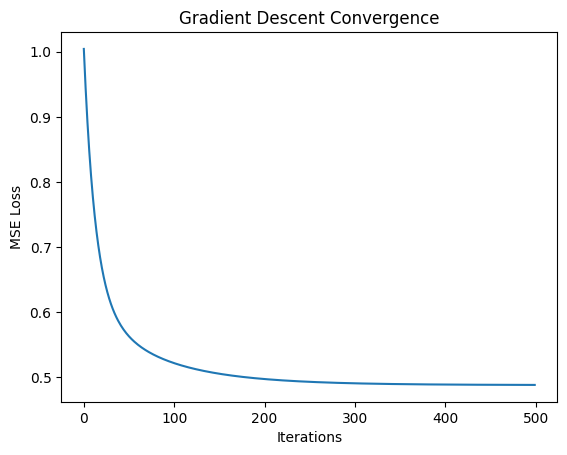

In [13]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.show()


Training on 100 samples...
Training on 3626 samples...
Training on 7152 samples...
Training on 10678 samples...
Training on 14204 samples...
Training on 17730 samples...
Training on 21256 samples...
Training on 24782 samples...
Training on 28308 samples...
Training on 31835 samples...
Training on 35361 samples...
Training on 38887 samples...
Training on 42413 samples...
Training on 45939 samples...
Training on 49465 samples...
Done.


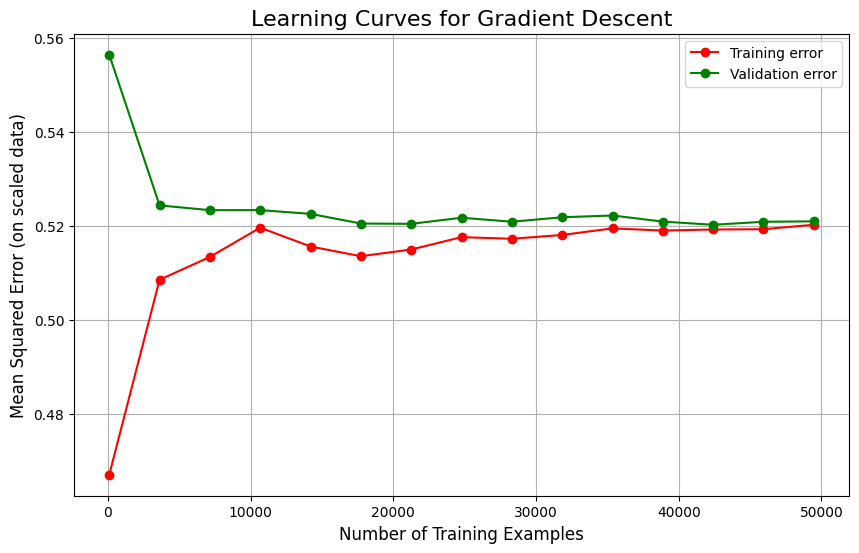

In [14]:
# --- Configuration ---
# Define the sizes of the training subsets to evaluate on.
train_sizes = np.linspace(100, X_train_scaled.shape[0] * 0.8, 15, dtype=int)
# Initialize lists to store the error scores
train_errors = []
val_errors = []
# Get the full validation set (we evaluate against this every time)
X_val_mat = X_test_scaled.values.astype(float)
y_val_mat = y_test_scaled.values.astype(float) # Using the scaled validation target
# --- Hyperparameters for the temporary models ---
alpha = 0.001
n_iter = 1000 # A lower number of iterations for speed during this diagnostic
# --- Main Loop ---
# Iterate over the different training set sizes
for m in train_sizes:
    print(f"Training on {m} samples...")
    # 1. Select a subset of the training data
    X_train_subset = X_train_scaled.iloc[:m].values.astype(float)
    y_train_subset = y_train_scaled.iloc[:m].values.astype(float)
    # 2. Train a new model from scratch on the subset
    n_samples, n_features = X_train_subset.shape
    w = np.random.randn(n_features, y_train_subset.shape[1]) * 0.01 # Re-initialize weights
    for i in range(n_iter):
        y_pred_loop = X_train_subset.dot(w)
        error_loop = y_pred_loop - y_train_subset
        grad_loop = (2 / n_samples) * X_train_subset.T.dot(error_loop)
        w -= alpha * grad_loop
    # 3. Make predictions on the training subset and the full validation set
    y_train_pred = X_train_subset.dot(w)
    y_val_pred = X_val_mat.dot(w)
    # 4. Calculate the Mean Squared Error for both and store them
    train_mse = np.mean((y_train_subset - y_train_pred) ** 2)
    val_mse = np.mean((y_val_mat - y_val_pred) ** 2)
    train_errors.append(train_mse)
    val_errors.append(val_mse)
print("Done.")
# --- Plotting the Curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, 'o-', color="r", label="Training error")
plt.plot(train_sizes, val_errors, 'o-', color="g", label="Validation error")
plt.title("Learning Curves for Gradient Descent", fontsize=16)
plt.xlabel("Number of Training Examples", fontsize=12)
plt.ylabel("Mean Squared Error (on scaled data)", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

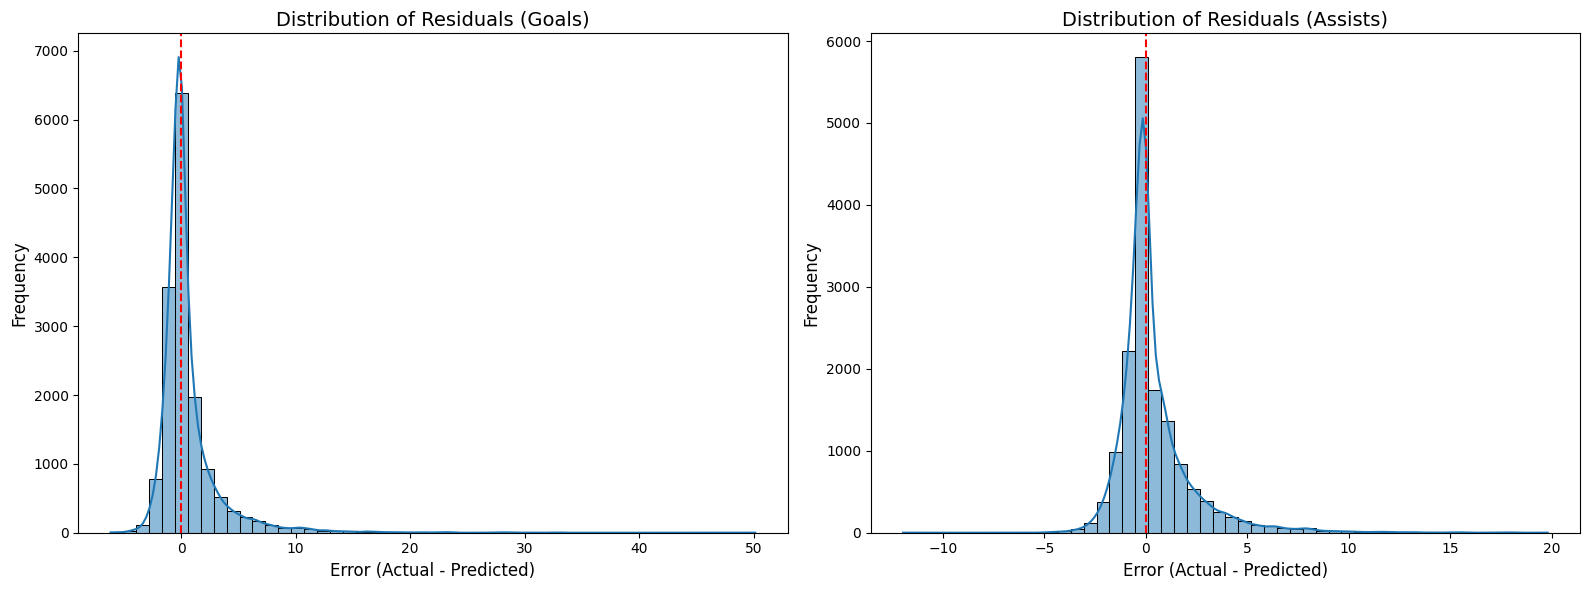

In [15]:
import seaborn as sns
# This code assumes you have already run the prediction cell and have:
# y_actual: The true target values (NumPy array)
# y_pred_final: Your model's final predictions (NumPy array)
# Calculate the residuals (the difference between actual and predicted values)
residuals = y_actual - y_pred_final

# --- Plot: Distribution of Residuals ---
# This plot shows the overall bias of the model.
# Ideally, we want to see a bell-shaped curve (normal distribution) centered at 0.
# If the curve is shifted, it means the model is consistently predicting too high or too low.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Distribution plot for Goal Residuals
sns.histplot(residuals[:, 0], kde=True, ax=ax1, bins=50)
ax1.axvline(x=0, color='r', linestyle='--')
ax1.set_title('Distribution of Residuals (Goals)', fontsize=14)
ax1.set_xlabel('Error (Actual - Predicted)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
# Distribution plot for Assist Residuals
sns.histplot(residuals[:, 1], kde=True, ax=ax2, bins=50)
ax2.axvline(x=0, color='r', linestyle='--')
ax2.set_title('Distribution of Residuals (Assists)', fontsize=14)
ax2.set_xlabel('Error (Actual - Predicted)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
# --- Save the Linear Regression (Gradient Descent) Model Assets ---
import os
import pickle
import numpy as np
# Define the directory to save the assets
save_dir = 'saved_model/gradient_descent'
os.makedirs(save_dir, exist_ok=True)
# --- Save the Weights (the "model") ---
# The 'w' variable holds the final trained weights from the gradient descent loop.
weights_path = os.path.join(save_dir, 'weights.npy')
np.save(weights_path, w)
print(f"✅ Gradient Descent weights saved to:   {weights_path}")
# --- Save the Scaling Parameters ---
# In this notebook, scaling was also done manually. We save the parameters.
scaling_params = {
    'mean': mean.values,     # Save as NumPy array
    'std': std.values,       # Save as NumPy array
    'y_mean': y_mean.values, # Save as NumPy array
    'y_std': y_std.values    # Save as NumPy array
}
scalers_path = os.path.join(save_dir, 'scalers.pkl')
with open(scalers_path, 'wb') as f:
    pickle.dump(scaling_params, f)
print(f"✅ Gradient Descent scaling parameters saved to:   {scalers_path}")
# --- Save the Column Order ---
col_order = X_train.columns.tolist()
col_order_path = os.path.join(save_dir, 'col_order.pkl')
with open(col_order_path, 'wb') as f:
    pickle.dump(col_order, f)
print(f"✅ Column order saved to:  {col_order_path}")
print("\nAll necessary assets for the Gradient Descent model have been saved.")


✅ Gradient Descent weights saved to:   saved_model/gradient_descent/weights.npy
✅ Gradient Descent scaling parameters saved to:   saved_model/gradient_descent/scalers.pkl
✅ Column order saved to:  saved_model/gradient_descent/col_order.pkl

All necessary assets for the Gradient Descent model have been saved.


In [20]:
col_order

['bias',
 'season',
 'age_at_season_start',
 'height_in_cm',
 'appearances_season',
 'total_minutes_played_season',
 'position_Attack',
 'position_Defender',
 'position_Midfield',
 'foot_left',
 'foot_right']